## Install the required packages onto your environment. You only have to do this once!

In [126]:
install.packages("ggplot2")
install.packages("pillar")
install.packages("dplyr")
install.packages("readxl")
install.packages("lubridate")

Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'pillar' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'lubridate' is in use and will not be installed"


## Load the required packages. Do this every time you open the notebook.

In [127]:
library(readxl)
library(pillar)
library(ggplot2)
library(dplyr)
library(lubridate)

### Read in the datasets that were given for this assignment. They are all located within a file called 'datasets'. Put this folder in the same location as this assignment. If you do that you shouldn't have to change the filepath at all.

In [128]:
#reading in a microsoft excel sheet
data <- read_excel("datasets\\CUPD_data.xlsx")

#reading in several csv files that are subsets of the larger database. Essentially, we have already cleaned and organized a lot of the data sets for you

#Crimes By Category on Campus
CampusCrimesInfo <- read.csv(file = 'datasets/CampusCrimesInfo.csv')
#Crimes By Category in the Community
CommCrimesInfo <- read.csv(file = 'datasets/CommCrimesInfo.csv')
#Total Crimes in Community/Campus
Crime <- read.csv(file = 'datasets/Crime.csv')
#Total Crimes Reported By Month Over 5 Year Period
DateInfoMonthly <- read.csv(file = 'datasets/DateInfoMonthly.csv')
#Total Crimes Based Off Of Incident Type
incidentInfoSorted <- read.csv(file = 'datasets/incidentInfoSorted.csv')
#Total Crimes Reported By Over a 24-Hour Period
timeInfoHourly <- read.csv(file = 'datasets/timeInfoHourly.csv')
#Total Crimes Reported Per Day of The Week
DayOfWeek <- read.csv(file = 'datasets/DayOfWeek.csv')

#this last line is used to order the x-axis in a mon-sun order rather than the default ordering that the dataframe has
DayOfWeek$day <- ordered(DayOfWeek$day, levels = c(levels=c("Monday", "Tuesday", "Wednesday", "Thursday", 
"Friday", "Saturday", "Sunday")))

### Verify that all of the datasets loaded correctly. There should be 8 different tables.

In [129]:
#Head gives you the first 6 rows of the dataframe. You can change the number of rows returned by adding an integer argument
#For example, this will return 10 rows --> head(data, 10)
#you can also use the tail() function in the same way

head(data)
head(CampusCrimesInfo)
head(CommCrimesInfo)
head(Crime)
head(DateInfoMonthly)
head(incidentInfoSorted)
head(timeInfoHourly)
head(DayOfWeek)

CaseNumber,DateLogged,DateReported,TimeReported,DateIncidentBegan,TmeIncidentBegan,DateIncidentEnded,TimeIncidentEnded,Location,IncidentType,CriminalOffense,Disposition,Latitude,Longitude,BuildingName,LocationType,CampusZone
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
2015-00001265,07/01/2015,07/01/2015,12:47,07/01/2015,12:47,07/01/2015,12:47,30TH ST / COLORADO AVE,Traffic Offense,DROVE VEHICLE WHILE LICENSE UNDER RESTRAINT (SUSPENDED/REVOKED/DENIED),Cleared - Summons,40.00784,-105.2534,0,0,0
2015-00001266,07/01/2015,07/01/2015,13:44,06/01/2015,00:00,06/29/2015,00:00,1111 ENGINEERING DR,Theft,"THEFT $750 OR MORE BUT LESS THAN $2,000 - OTHER (MISDEMEANOR)",No Further Action,40.00717,-105.2627,ENGINEERING CENTER,Academic,Central Campus
2015-00001269,07/01/2015,07/01/2015,17:28,07/01/2015,17:28,07/01/2015,17:28,1515 CENTRAL CAMPUS MALL,Criminal Trespass,TRESPASS,No Further Action,40.00808,-105.2736,UNIVERSITY THEATRE,Academic,Central Campus
2015-00008155,07/01/2015,06/29/2015,19:08,06/28/2015,20:30,06/28/2015,20:30,2200 WILLARD LOOP DR,Criminal Mischief,GRAFFITI PROHIBITED ON ANY PROPERTY,No Further Action,40.00521,-105.2663,WILLARD HALL,Residential,Central Campus
2015-00001272,07/01/2015,07/02/2015,21:05,07/02/2015,20:50,07/02/2015,21:05,1060 REGENT DR,Other Offense,POSSESSING/SELLING OF ALCOHOL BY MINORS,Cleared - Summons,40.00685,-105.2597,GROUNDS RECYCLING OPERATIONS CNTR,Facilities,Central Campus
2015-00001272,07/01/2015,07/02/2015,21:05,07/02/2015,20:50,07/02/2015,21:05,1060 REGENT DR,Other Offense,URINATING IN PUBLIC,Cleared - Summons,40.00685,-105.2597,GROUNDS RECYCLING OPERATIONS CNTR,Facilities,Central Campus


,Var1,Freq,Type
,<chr>,<int>,<chr>
1,Drug Violation,2911,On-Campus
2,Theft,2103,On-Campus
3,Alcohol Violation,1918,On-Campus
4,Other Offense,685,On-Campus
5,Criminal Mischief,572,On-Campus
6,Criminal Trespass,396,On-Campus


,Var1,Freq,Type
,<chr>,<int>,<chr>
1,DUI/DWAI,1001,Off-Campus
2,Traffic Offense,925,Off-Campus
3,Other Offense,342,Off-Campus
4,Theft,287,Off-Campus
5,Alcohol Violation,233,Off-Campus
6,Warrant,223,Off-Campus


,Var1,Freq,Type
,<chr>,<int>,<chr>
1,DUI/DWAI,1001,Off-Campus
2,Traffic Offense,925,Off-Campus
3,Other Offense,342,Off-Campus
4,Theft,287,Off-Campus
5,Alcohol Violation,233,Off-Campus
6,Warrant,223,Off-Campus


,month,amount
,<chr>,<int>
1,2014-08-01,3
2,2015-01-01,1
3,2015-04-01,2
4,2015-06-01,16
5,2015-07-01,148
6,2015-08-01,284


,Var1,Freq
,<chr>,<int>
1,Drug Violation,3123
2,Theft,2392
3,Alcohol Violation,2151
4,Traffic Offense,1257
5,DUI/DWAI,1066
6,Other Offense,1027


,Var1,amount
,<int>,<int>
1,0,1558
2,1,1217
3,2,912
4,3,485
5,4,305
6,5,172


,day,amount
,<ord>,<int>
1,Friday,2678
2,Monday,1909
3,Saturday,2488
4,Sunday,1936
5,Thursday,2159
6,Tuesday,1771


## Scatter Plot Vs Line Plot

There are tons of options to plot our data, so we should always try to think about what the best one is before we make a graph. Scatter plots can be helpful in certain situations, but they can also be incredibly confusing to look at when we are considering change over time. Take a look at the plots below to gain a better understanding of what I mean. We can see that this scatter plot looks all over the place and it is hard to follow what is happening over time.

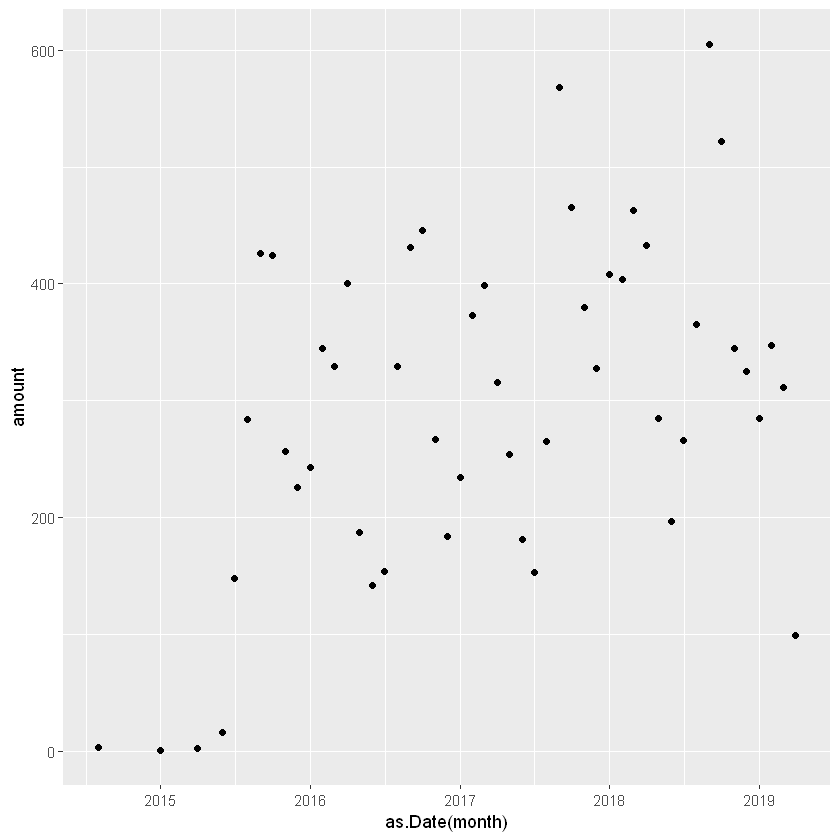

In [130]:
#to make a ggplot you need to include the name of the dataset (DateInfoMonthy), and then an aesthetic tag aes(). In the aes tag you specify a variable to an axis.
ggplot(DateInfoMonthly, aes(x = as.Date(month), y = amount)) +
    #we include the + symbol as a way to link the functions together. We do this at every step in a ggplot.
    geom_point()

Compare the above scatter plot with this line plot of the same data. This gives us a much better visual of how the police reports flucutate over time.

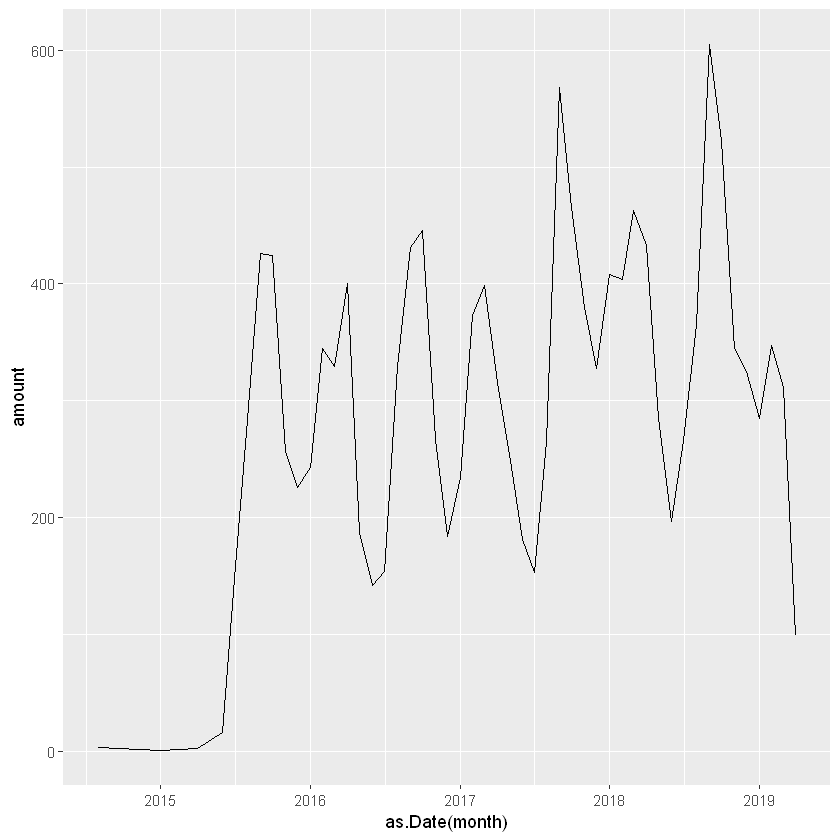

In [131]:
#to make a ggplot you need to include the name of the dataset (DateInfoMonthy), and then an aesthetic tag aes(). In the aes tag you specify a variable to an axis.
ggplot(DateInfoMonthly, aes(x = as.Date(month), y = amount)) +
    #we include the + symbol as a way to link the functions together. We do this at every step in a ggplot.
    geom_line()

Here is an example of a more aesthetically detailed scatter plot. This example is still relevant even though this isn't the best data for a scatter plot. Take note of some of the additional features that were added.

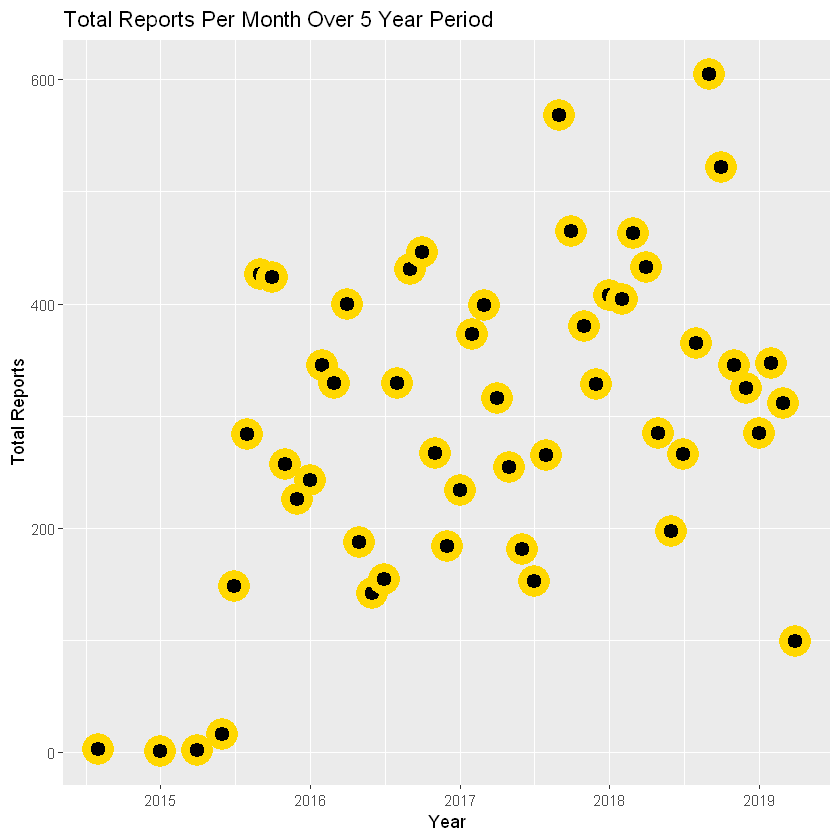

In [132]:
ggplot(DateInfoMonthly, aes(x = as.Date(month), y = amount)) +
    #we can change our graph by modifying the inputs in our function.
    #color determines the border, fill is the inside color, size determines the size of the circle
    #stroke determines the width of the border, shape sets the shape of the dot. In this case if makes it multi colored.
    #na.rm = TRUE removes any null values
    #all of these tags are optional and are only used to modify how the graph looks visually
    geom_point(color = "gold", fill = "black", size = 4, stroke = 4, shape = 21, na.rm = TRUE) +
    #we use this line to set our x label
    xlab("Year") +
    #we use this line to set our y label
    ylab("Total Reports") +
    #we use this line to set a title to our graph
    ggtitle("Total Reports Per Month Over 5 Year Period")

## Bar Chart

Bar Chart's are another great way to visualize our data. I tend to use this graph very fruently for data science visualizations.

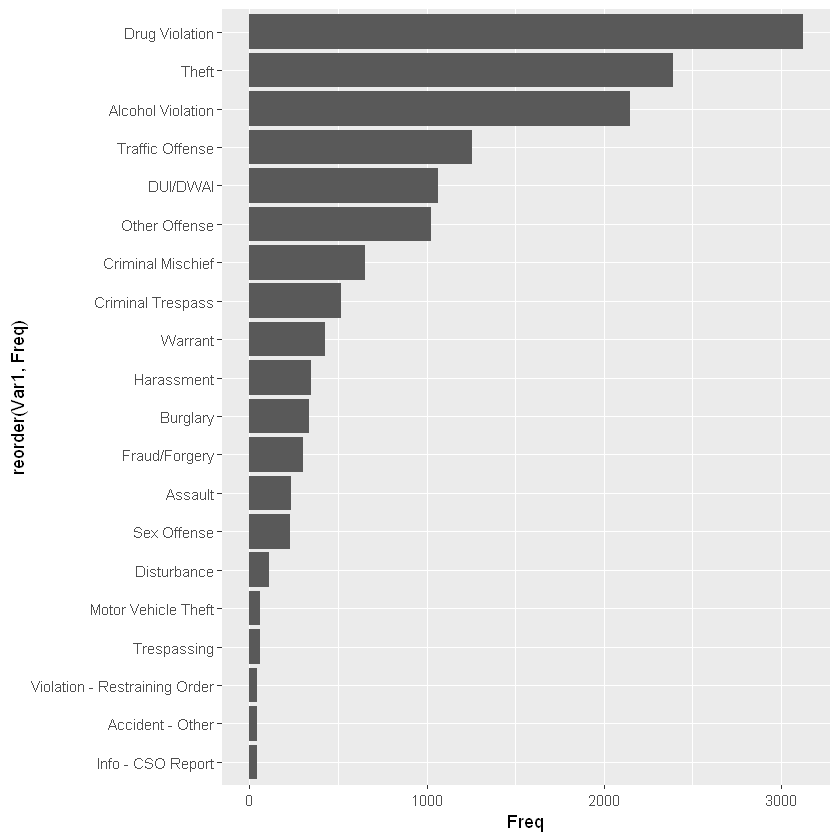

In [133]:
#here we are reordering the columns in our graph so that they are in numerical order. You can see that we are switching to order by the size instead of the name of the violation.
ggplot(incidentInfoSorted, aes(x = Freq, y = reorder(Var1, Freq))) +
    #stat = "identity" is a simple syntax issue. If we do not have it we will get an error for this graph. It's not always needed, but sometimes you have to add it.
    geom_bar(stat = "identity")

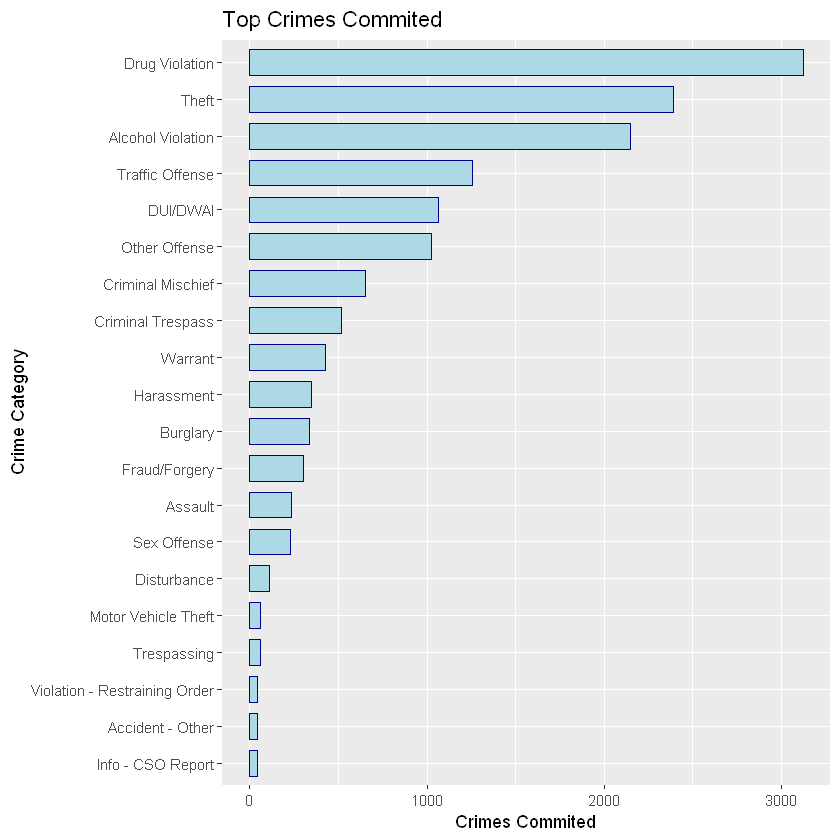

In [134]:
ggplot(incidentInfoSorted, aes(x = Freq, y = reorder(Var1, Freq))) +
    #similarly to the other graph, color is the border and fill is the inside color. We can also change the width of the bars by using the width tag.
    geom_bar(stat = "identity", color = "darkblue", fill = "lightblue", width = .7) +
    #set x axis label
    xlab("Crimes Commited") +
    #set y axis label
    ylab("Crime Category") +
    #set title label
    ggtitle("Top Crimes Commited")

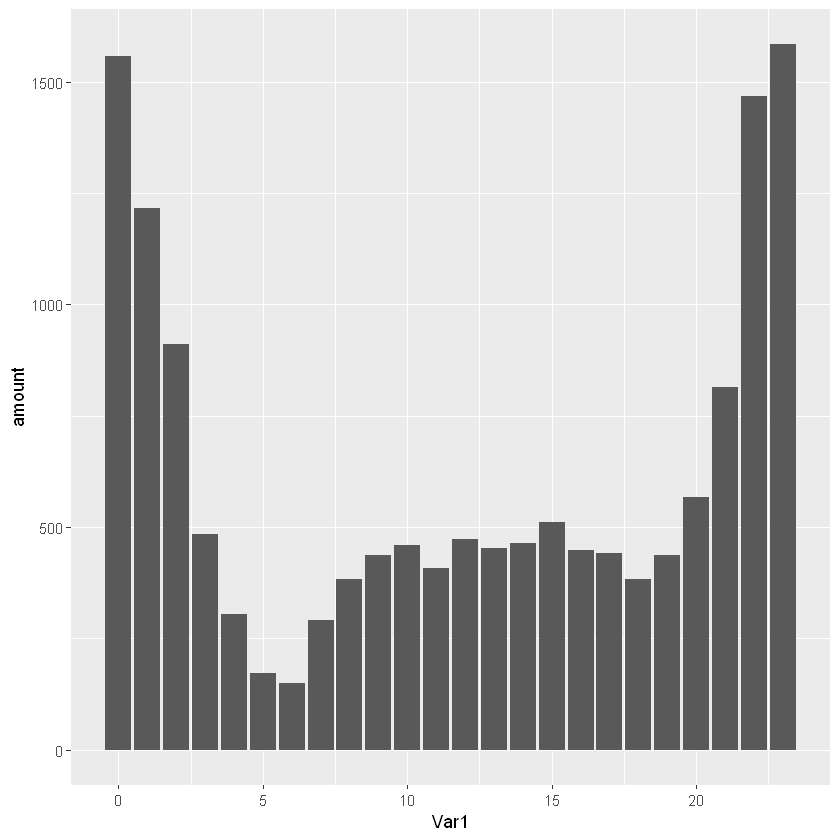

In [135]:
#no reordering is used here because we want to look at how reports change per hour.
ggplot(timeInfoHourly, aes(x = Var1, y = amount)) +
    geom_bar(stat = "identity")

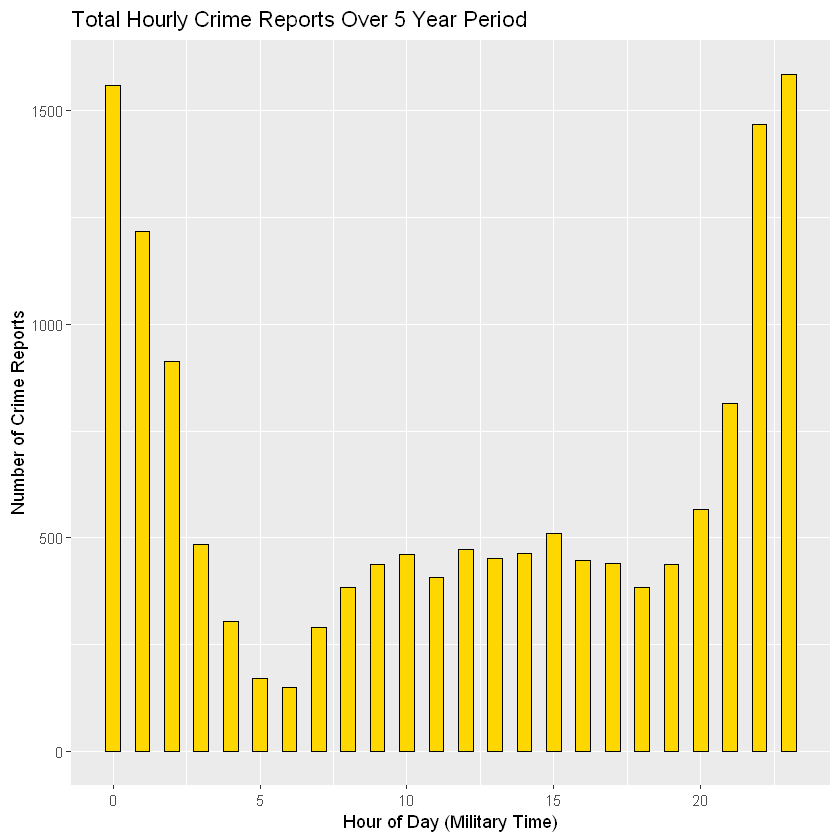

In [136]:
ggplot(timeInfoHourly, aes(x = Var1, y = amount)) +
    #same as previous bar graph, just with different colors and a different width
    geom_bar(stat = "identity", color = "Black", fill = "Gold", width = .5) +
    #set x label
    xlab("Hour of Day (Military Time)") +
    #set y label
    ylab("Number of Crime Reports") +
    #set title
    ggtitle("Total Hourly Crime Reports Over 5 Year Period")

## Histograms

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


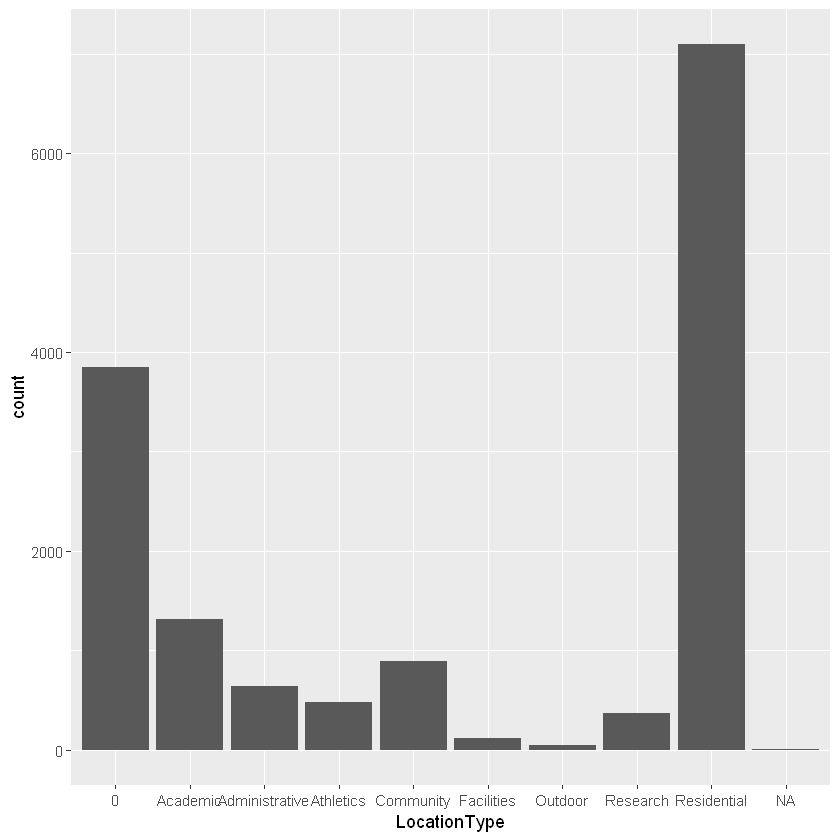

In [137]:
#histograms only take in one axis. you can specify whether it is the x or y axis however
ggplot(data, aes(x = LocationType)) +
    #setting our stat = count so that we return the number of times each word occurred in the LocationType column
    geom_histogram(stat = "count")
    #notice that the names are a little difficult to read on the x axis. we will change this in the next cell.

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


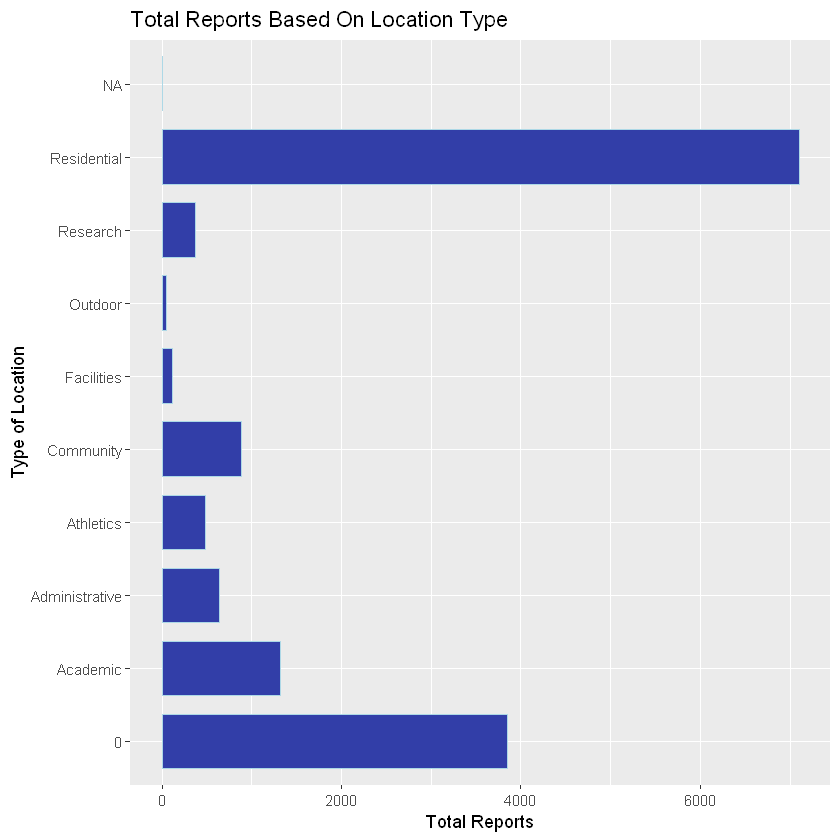

In [138]:
#we have a couple of options to flip the axis. we could either set location type = y instead of = x. 
#Or we can use the coord_flip() function to swap our axis
ggplot(data, aes(y = LocationType)) +
    geom_histogram(stat = "count", color = "lightblue", fill = "#323ea8", width = .75) +
    #coord_flip() +
    xlab("Total Reports") +
    ylab("Type of Location") +
    ggtitle("Total Reports Based On Location Type")

# Your Turn!

### Scatter Plot Vs Line Plot Vs Bar Plot

Using the "DayOfWeek" dataset, make a scatter/bar plot with the day of week on the x-axis and the amount of crimes on the y-axis. Make sure you look at the column names in the dataset. Which one do you think is the best visualization for this dataset?

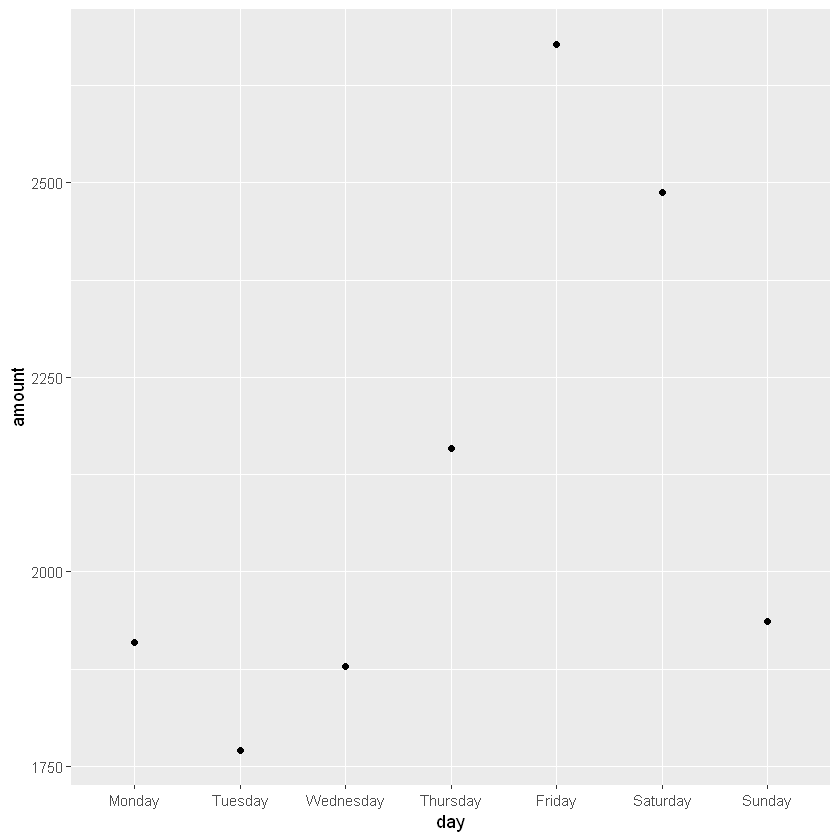

In [139]:
#Write code here
ggplot(DayOfWeek, aes(x = day, y = amount)) +
    geom_point()

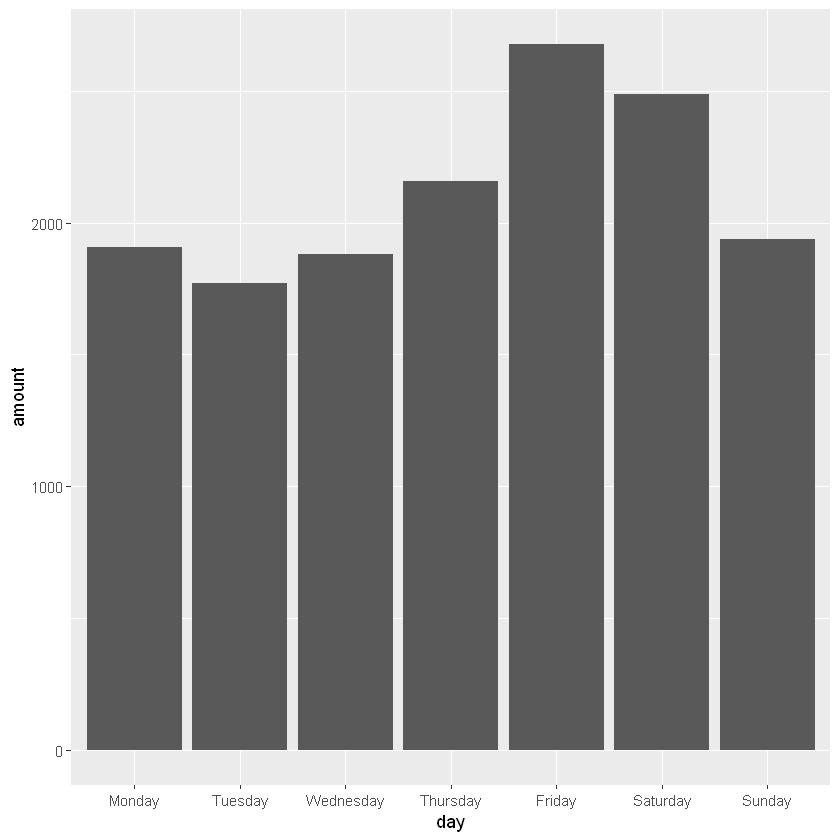

In [140]:
ggplot(DayOfWeek, aes(x = day, y = amount)) +
    geom_bar(stat = "identity")

## Bar Chart

Lets look at different crime frequencies based on if they were on campus or off-campus. 

Using the code provided in the example, make two bar charts below. How do these charts differ? How do they compare to the one in total?

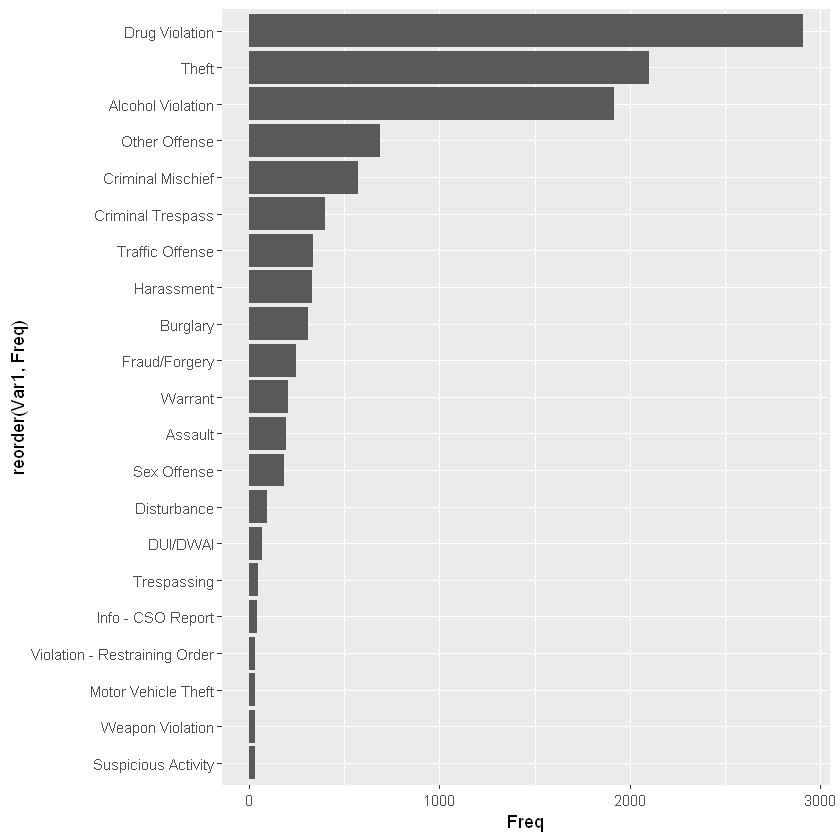

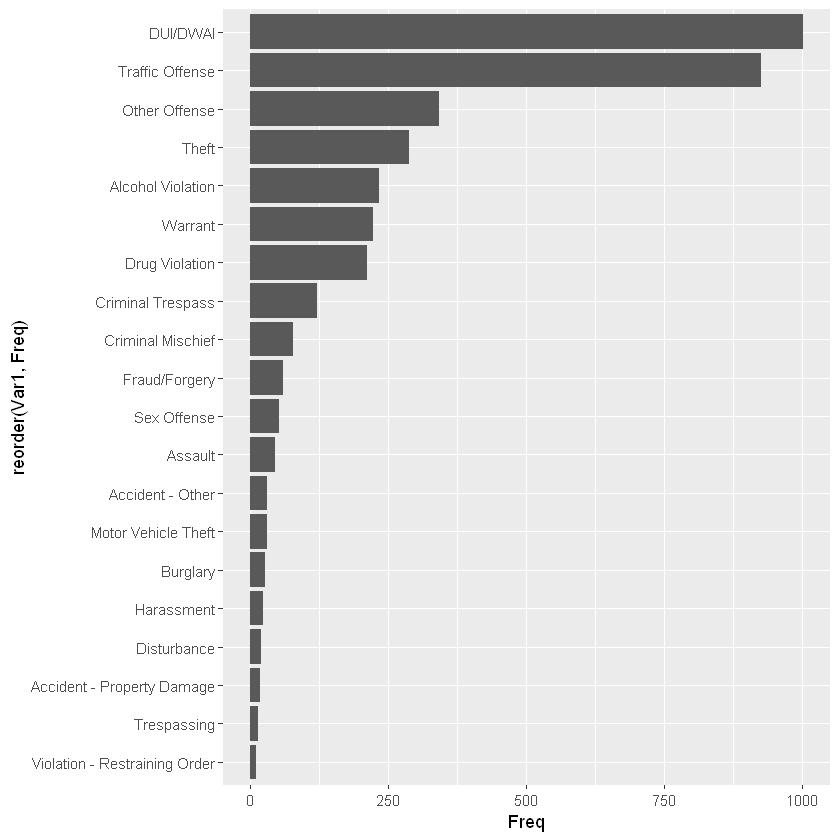

In [141]:
ggplot(CampusCrimesInfo, aes(x = Freq, y = reorder(Var1, Freq))) +
  geom_bar(stat = "identity")
ggplot(CommCrimesInfo, aes(x = Freq, y = reorder(Var1, Freq))) +
  geom_bar(stat = "identity")

There is an easier way to compare data. Using the same dataset, you can assign different colors to different sub-groups. Using the "Crime" dataset, try adding "fill = type" after the x and y arguments in aes(). In this case, you cannot add the "fill"argument in the geom_bar() part of the code. 

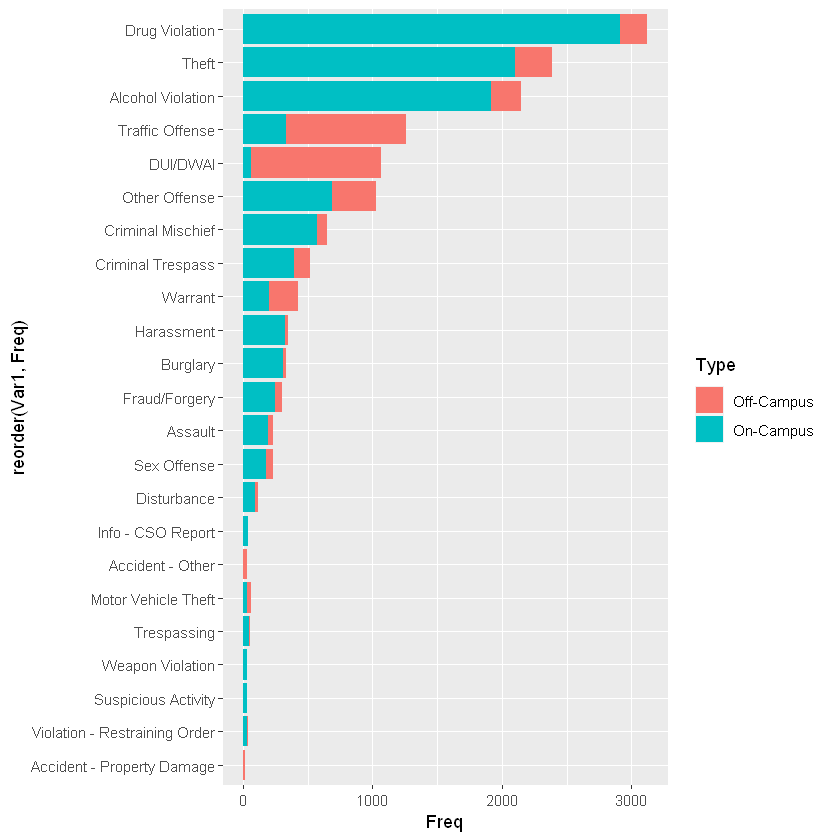

In [142]:
ggplot(Crime, aes(x = Freq, y = reorder(Var1, Freq), fill = Type)) +
 geom_bar(stat = "identity")

## Histogram

Here you will make a histogram of number of incident types that occur in each building. Use the "data" dataset and find what column that tells you what building the incident happened in, and using the code above make a histogram. 

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"


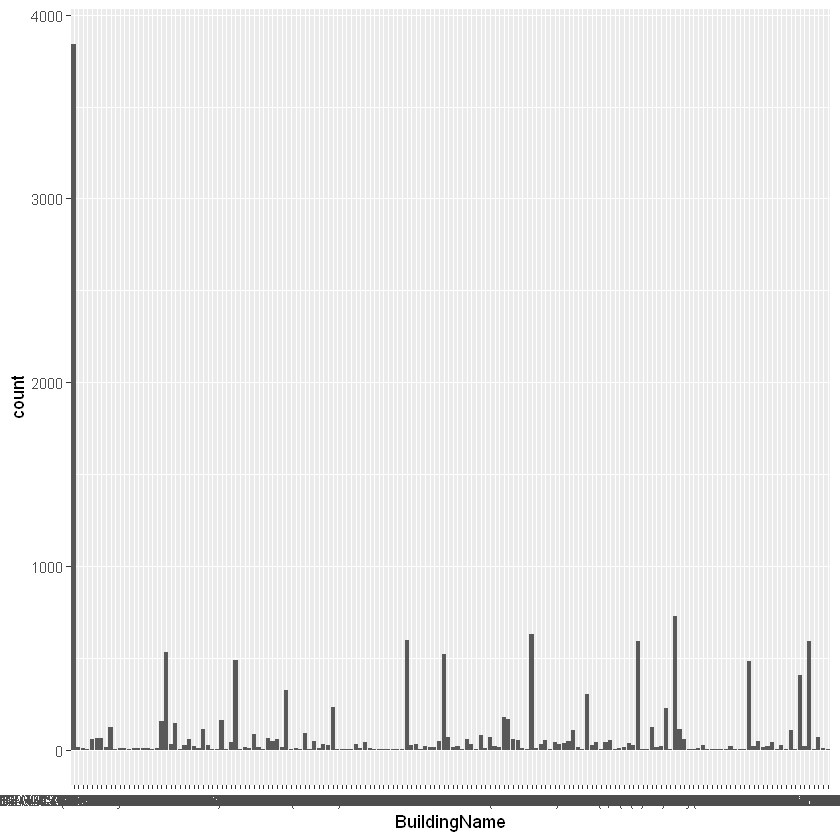

In [125]:
#Write code here 
ggplot(data, aes(x = BuildingName)) +
    geom_histogram(stat = "count")